In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import ipywidgets
from ipywidgets import interact, interactive, Dropdown, widgets
from IPython.display import clear_output, display, HTML

In [3]:
import os
import pickle
import pprint
from glob import glob
os.chdir('/home/users/alexno/sleep-staging')

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from h5py import File

from utils.plotting import plot_psg_hypnogram_hypnodensity
from utils.plotting import plot_hypnodensity

In [4]:
available_predictions = glob("experiments/**/SSC-WSC_test_predictions.pkl", recursive=True)
pprint.pprint(available_predictions)

['experiments/massc/att30/20201124_080609/SSC-WSC_test_predictions.pkl',
 'experiments/massc/avg_kw21/20201126_043826/SSC-WSC_test_predictions.pkl']


In [13]:
selected_experiment = available_predictions[1]
with open(selected_experiment, 'rb') as f:
    predictions = pickle.load(f)
list_studies = list(predictions.keys())
df = pd.read_csv('overview_file_cohortsEM-ling1.csv')
df_preds = pd.read_csv(os.path.join(os.path.dirname(selected_experiment), 'SSC-WSC_test_results.csv'), index_col=0)
df_preds = pd.merge(left=df_preds, right=df[['ID', 'Diagnosis', 'Label']], how='left', right_on='ID', left_on='SubjectID')
display(df_preds.query('Label == 0').sort_values('Kappa', ascending=False).head())

,FileID,SubjectID,Window,Case,Accuracy,Balanced accuracy,Kappa,F1,Precision,Recall,...,Precision - N3,Recall - N3,Support - N3,F1 - REM,Precision - REM,Recall - REM,Support - REM,ID,Diagnosis,Label
176,C1584_3 172654.h5,C1584_3 172654,1 s,all,0.912027,0.815213,0.865526,0.784308,0.761220,0.815213,...,0.485714,0.586207,29.0,0.896175,0.872340,0.921348,89.0,C1584_3 172654,'NON-NARCOLEPSY CONTROL',0
392,SSC_5254_1.h5,SSC_5254_1,1 s,all,0.939673,0.860957,0.850046,0.784946,0.790100,0.860957,...,0.947368,0.947368,57.0,0.000000,0.000000,0.000000,0.0,SSC_5254_1,'NON-NARCOLEPSY CONTROL',0
421,SSC_5547_1.h5,SSC_5547_1,1 s,all,0.899548,0.877883,0.848494,0.850218,0.828665,0.877883,...,0.808383,0.957447,141.0,0.951220,0.917647,0.987342,158.0,SSC_5547_1,'NON-NARCOLEPSY CONTROL',0
197,C2209_4 233629.h5,C2209_4 233629,1 s,all,0.888122,0.854197,0.844454,0.833848,0.834242,0.854197,...,0.915254,0.739726,73.0,0.960396,0.960396,0.960396,101.0,C2209_4 233629,'NON-NARCOLEPSY CONTROL',0
28,A0531_6 175138.h5,A0531_6 175138,1 s,all,0.888331,0.871765,0.843528,0.832315,0.819650,0.871765,...,0.758065,0.824561,57.0,0.928910,0.980000,0.882883,111.0,A0531_6 175138,'NON-NARCOLEPSY CONTROL',0


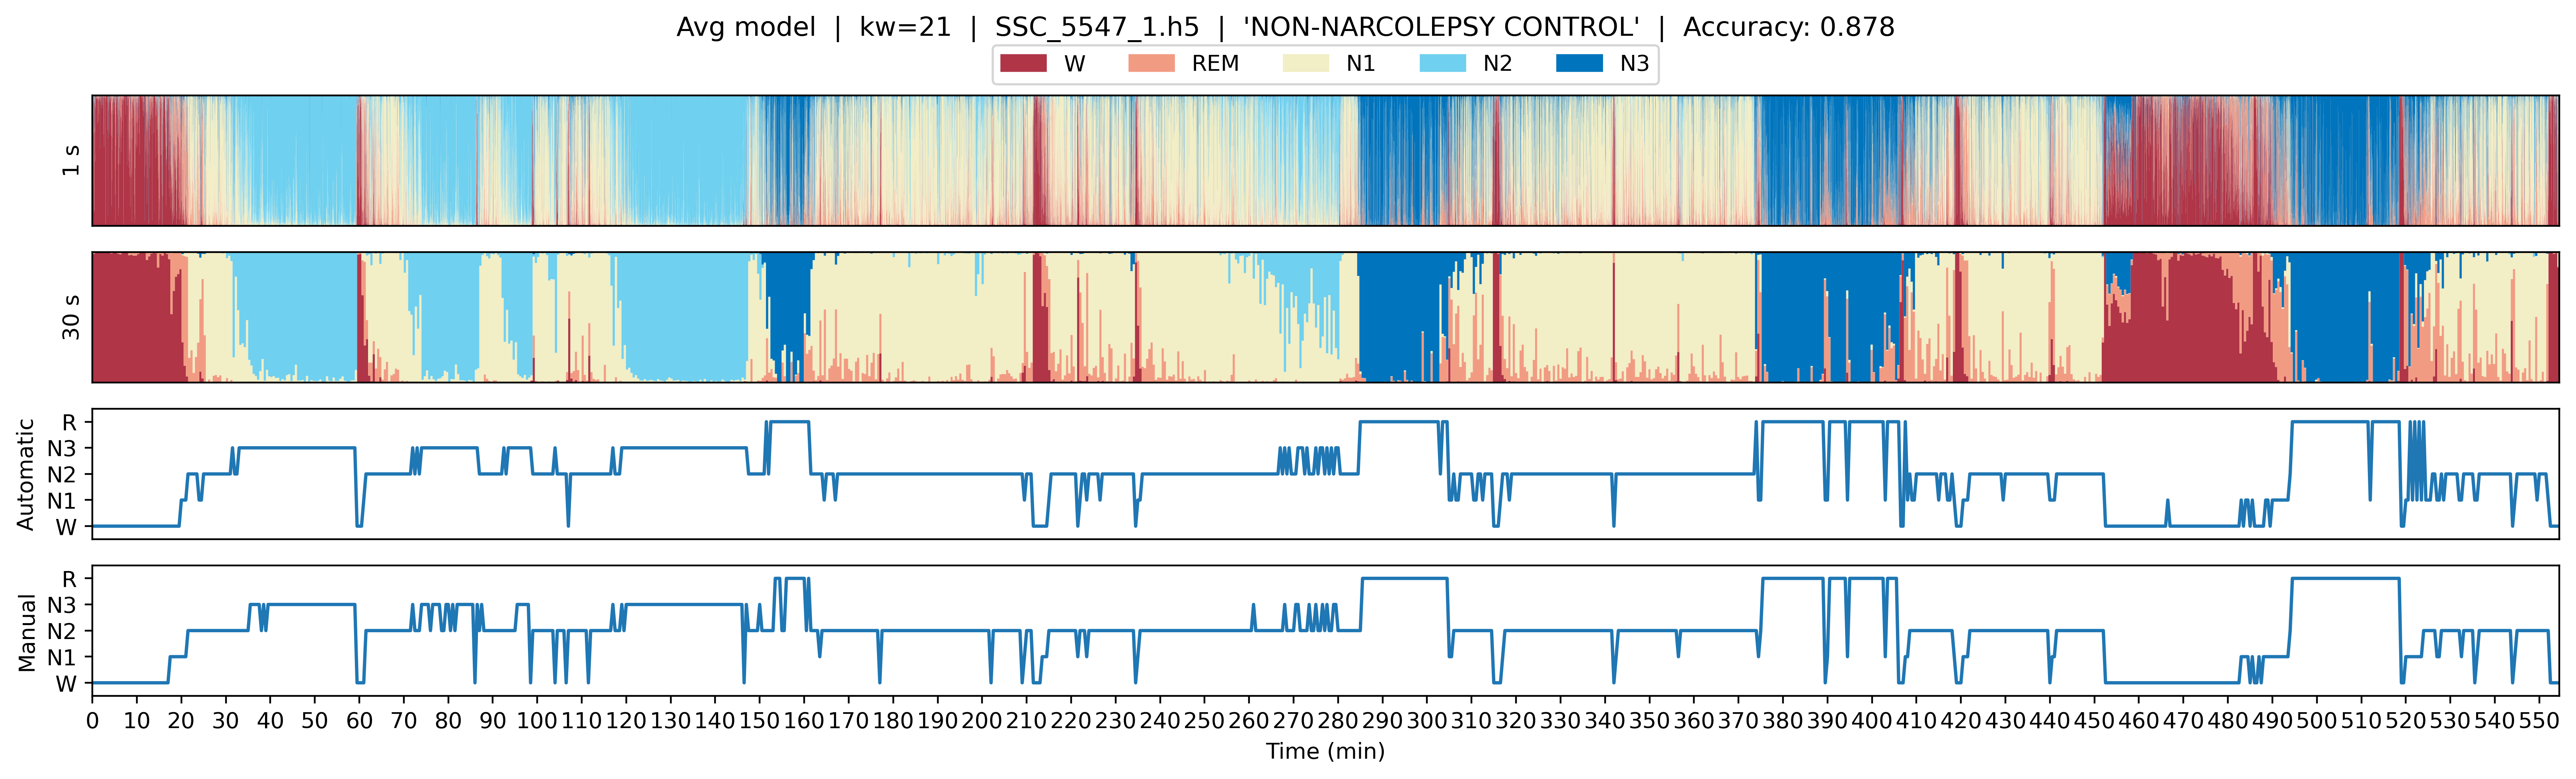

In [16]:
# selected_record = 'C1584_3 172654.h5'
# selected_record = 'SSC_5254_1.h5'
selected_record = 'SSC_5547_1.h5'
record = predictions[selected_record]
plot_hypnodensity(
    record['logits'], 
    record['predicted'], 
    record['true'], 
    title=("Avg model  |  " +
           "kw=21  |  " +
           f"{selected_record}  |  " +
           f"{df_preds.loc[df_preds['FileID'] == selected_record]['Diagnosis'].values[0]}  |  " +
           f"Accuracy: {df_preds.loc[df_preds['FileID'] == selected_record]['Balanced accuracy'].values[0]:.3f}")
)

In [ ]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=4, 
    interval=10
)

In [ ]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=8
)

In [ ]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=20,
    interval=10
)

In [ ]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=45,
    interval=5
)